KARTIK S GUPTA

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'D:\Intellipaat\Live Classes\ML\Project - Revenue Prediction\revenue_prediction.csv')

In [3]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [7]:
data['Name'].nunique()

100

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [13]:
data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [15]:
data.isna().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [ ]:
#Dropping the irrelevant columns

In [16]:
data.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"], inplace=True)
data

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
...,...,...
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689


In [18]:
#Splitting the dataset for creating independent features and dependent features

In [19]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [20]:
x

,Order_Placed
0,5.5
1,6.8
2,1.9
3,2.5
4,4.2
...,...
95,1.1
96,6.3
97,6.2
98,2.1


In [21]:
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [22]:
#Splitting the dataset into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=20,test_size=0.2)

In [26]:
x_train

,Order_Placed
37,2.6
51,3.1
35,3.6
65,1.6
31,1.9
...,...
28,4.6
95,1.1
15,3.1
90,3.3


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
y_pred

array([4065534.63231874, 5693881.02648614, 1685643.74853562,
       4316049.46219065, 1936158.57840753, 8199029.32520521,
       1309871.50372776, 2812960.48295921, 6194910.68622995,
       9952633.13430855, 4691821.70699851, 3439247.55763897,
       1685643.74853562, 7447484.83558949, 5443366.19661423,
       1435128.91866372, 2812960.48295921, 1184614.08879181,
       6570682.93103781, 5944395.85635804])

In [32]:
#Visualizing the training and testing results 

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Revenue')

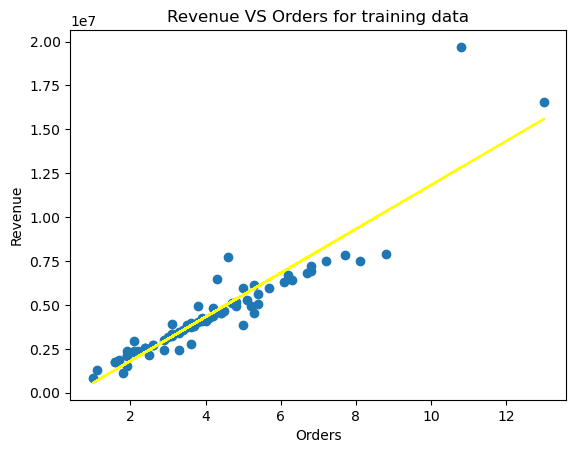

In [41]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train), color='yellow')
plt.title('Revenue VS Orders for training data')
plt.xlabel('Orders')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

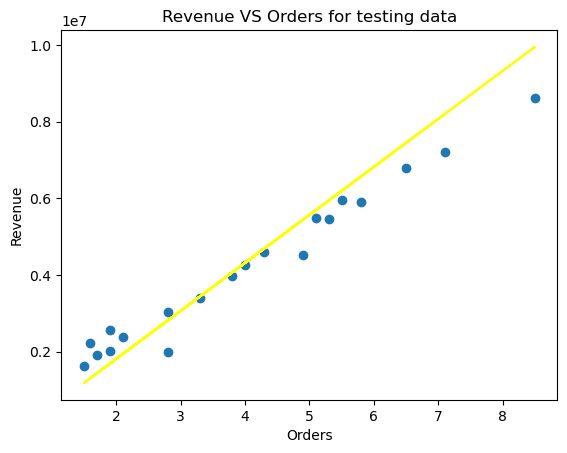

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color='yellow')
plt.title('Revenue VS Orders for testing data')
plt.xlabel('Orders')
plt.ylabel('Revenue')

In [44]:
#Calculating the accuracy of the model

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_pred,y_test)

0.9360117857719701